   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
Recommended Anime for 'Naruto':
                                                   name  rating
615                                  Naruto: Shipp

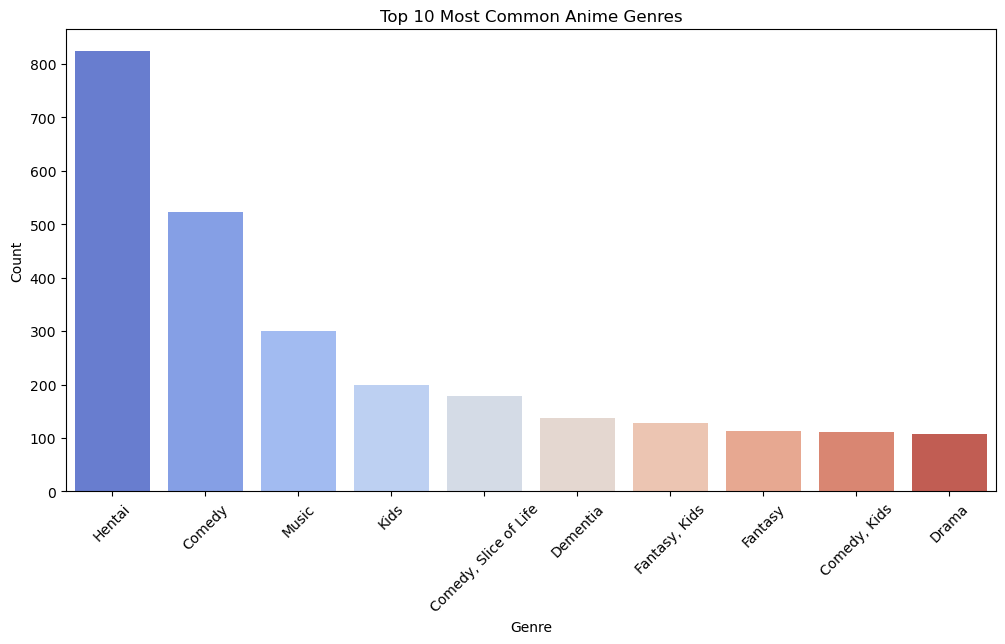

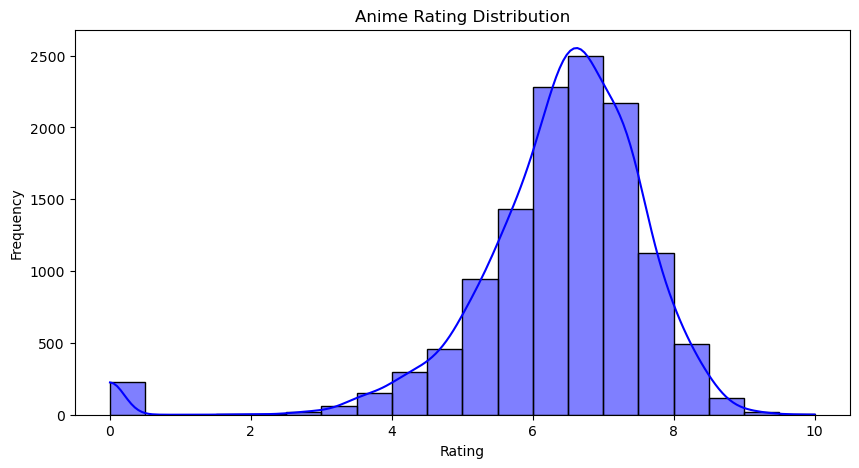

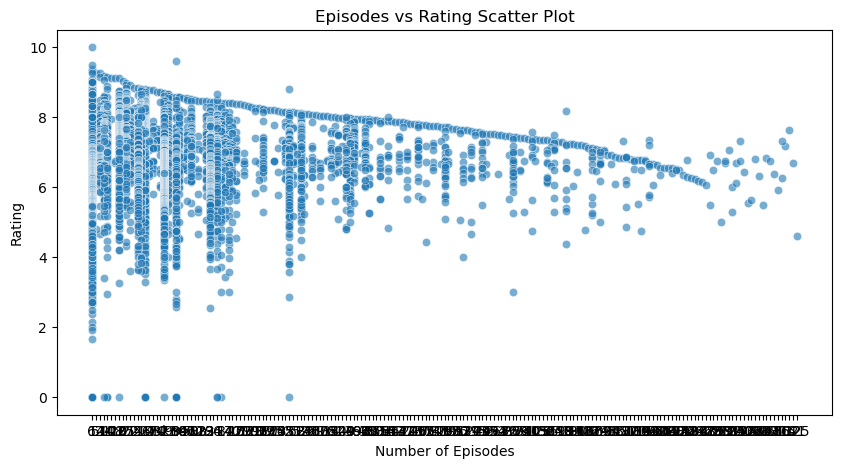

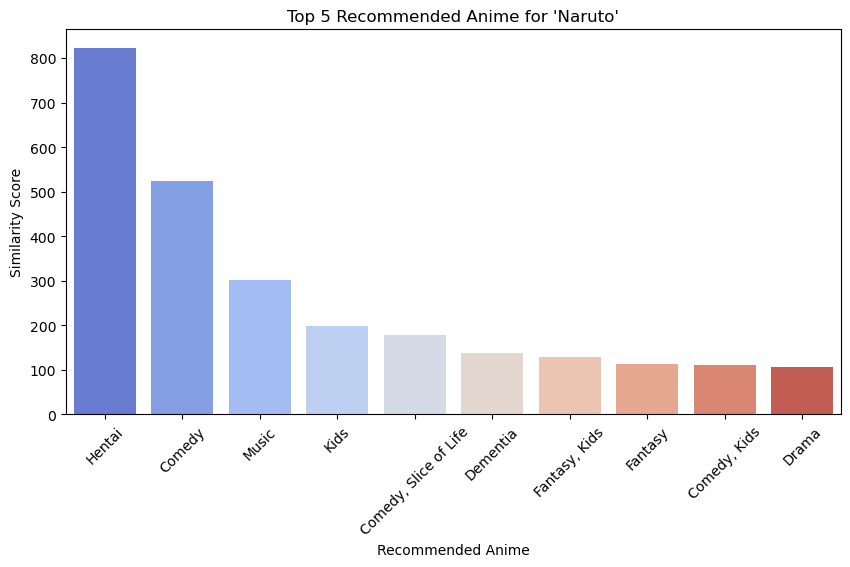

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset into a pandas DataFrame
FILE_PATH = r"D:\Data since couress\Recommendation System\Recommendation System\anime.csv"
anime_df = pd.read_csv(FILE_PATH)

# Handle missing values
anime_df['genre'] = anime_df['genre'].fillna('')
anime_df['type'] = anime_df['type'].fillna('')
anime_df['episodes'] = anime_df['episodes'].fillna(0)
anime_df['rating'] = anime_df['rating'].fillna(0.0)

# Explore the dataset
print(anime_df.head())

# Feature Extraction
anime_df['features'] = anime_df['genre'] + ' ' + anime_df['type'] + ' ' + anime_df['episodes'].astype(str) + ' ' + anime_df['rating'].astype(str)

# Convert categorical features into numerical representations using CountVectorizer
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(anime_df['features'])

# Recommendation System
def recommend_anime(anime_title, top_n=10):
    """Recommends similar anime based on cosine similarity."""
    if anime_title not in anime_df['name'].values:
        print(f"Error: '{anime_title}' not found in dataset.")
        return None
    
    target_index = anime_df[anime_df['name'] == anime_title].index[0]
    cosine_sim = cosine_similarity(feature_matrix[target_index], feature_matrix)
    
    similarity_scores = list(enumerate(cosine_sim[0]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    similar_anime_indices = [i[0] for i in similarity_scores[1:top_n+1]]
    recommended_anime = anime_df[['name', 'rating']].iloc[similar_anime_indices]
    
    return recommended_anime, similarity_scores[1:top_n+1]

# Example usage
anime_title = 'Naruto'
recommended_anime, similarity_scores = recommend_anime(anime_title, top_n=5)

if recommended_anime is not None:
    print(f"Recommended Anime for '{anime_title}':\n{recommended_anime}")

    # -------------------- Graphs --------------------

   # Genre Distribution (Fixed)
    plt.figure(figsize=(12, 6))
    genre_counts = anime_df['genre'].value_counts().head(10)
    sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, legend=False, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.title("Top 10 Most Common Anime Genres")
    plt.show()

    # Rating Distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(anime_df['rating'], bins=20, kde=True, color='blue')
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.title("Anime Rating Distribution")
    plt.show()

    # Episodes vs Rating Scatter Plot
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=anime_df['episodes'], y=anime_df['rating'], alpha=0.6)
    plt.xlabel("Number of Episodes")
    plt.ylabel("Rating")
    plt.title("Episodes vs Rating Scatter Plot")
    plt.show()

    # Similarity Score Bar Chart
    plt.figure(figsize=(10, 5))
    recommended_names = recommended_anime['name'].values
    similarity_values = [score[1] for score in similarity_scores]
    sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, legend=False, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.xlabel("Recommended Anime")
    plt.ylabel("Similarity Score")
    plt.title(f"Top {len(recommended_names)} Recommended Anime for '{anime_title}'")
    plt.show()